## Libraries

In [42]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

from sklearn.metrics import silhouette_score as ss

from sklearn_extra.cluster import KMedoids

import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

import plotly.express as px

import itertools

from matplotlib import gridspec 

from sklearn.cluster import OPTICS, cluster_optics_dbscan 

from fcmeans import FCM

from sklearn.datasets import make_blobs

from seaborn import scatterplot as scatter


In [31]:
saeb = pd.read_csv("saeb2021.csv")

In [32]:
saeb.head(10)

,Sigla da UF,Rede,TX_Apro,Indicador de Rendimento (P),SAEB_M,SAEB_P,Nota Média Padronizada (N),IDEB\n2021\n(N x P)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SG_UF,REDE,VL_APROVACAO_2021_SI_4,VL_INDICADOR_REND_2021,VL_NOTA_MATEMATICA_2021,VL_NOTA_PORTUGUES_2021,VL_NOTA_MEDIA_2021,VL_OBSERVADO_2021
3,RO,Municipal,100.0,1.00,ND,ND,-,-
4,RO,Estadual,-,-,-,-,-,-
5,RO,Municipal,98.7,0.99,ND,ND,-,-
6,RO,Municipal,-,-,-,-,-,-
7,RO,Estadual,96.8,0.97,258.05,272.48,5.51,5.3
8,RO,Municipal,-,-,-,-,-,-
9,RO,Municipal,-,-,-,-,-,-


In [34]:
saeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46253 entries, 0 to 46252
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sigla da UF                  46250 non-null  object
 1   Rede                         46248 non-null  object
 2   TX_Apro                      46248 non-null  object
 3   Indicador de Rendimento (P)  46248 non-null  object
 4   SAEB_M                       46248 non-null  object
 5   SAEB_P                       46248 non-null  object
 6   Nota Média Padronizada (N)   46248 non-null  object
 7   IDEB
2021
(N x P)            46248 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


In [35]:
saeb.isnull().sum()

Sigla da UF                    3
Rede                           5
TX_Apro                        5
Indicador de Rendimento (P)    5
SAEB_M                         5
SAEB_P                         5
Nota Média Padronizada (N)     5
IDEB\n2021\n(N x P)            5
dtype: int64

In [23]:
miss_vals = ["NaN", "ND", "-"]

In [37]:
saeb = pd.read_csv("saeb2021.csv", na_values = miss_vals)

In [38]:
saeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46253 entries, 0 to 46252
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sigla da UF                  46250 non-null  object
 1   Rede                         46248 non-null  object
 2   TX_Apro                      35164 non-null  object
 3   Indicador de Rendimento (P)  35164 non-null  object
 4   SAEB_M                       22219 non-null  object
 5   SAEB_P                       22219 non-null  object
 6   Nota Média Padronizada (N)   22219 non-null  object
 7   IDEB
2021
(N x P)            22213 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


In [39]:
saeb = saeb.dropna(axis = 0)

In [40]:
saeb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22213 entries, 2 to 46249
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sigla da UF                  22213 non-null  object
 1   Rede                         22213 non-null  object
 2   TX_Apro                      22213 non-null  object
 3   Indicador de Rendimento (P)  22213 non-null  object
 4   SAEB_M                       22213 non-null  object
 5   SAEB_P                       22213 non-null  object
 6   Nota Média Padronizada (N)   22213 non-null  object
 7   IDEB
2021
(N x P)            22213 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [41]:
saeb.tail()

,Sigla da UF,Rede,TX_Apro,Indicador de Rendimento (P),SAEB_M,SAEB_P,Nota Média Padronizada (N),IDEB\n2021\n(N x P)
46238,DF,Estadual,94.7,0.95,239.31,235.75,4.58,4.4
46240,DF,Estadual,93.9,0.95,259.99,270.43,5.51,5.2
46245,DF,Estadual,98.4,0.99,258.07,256.03,5.24,5.2
46246,DF,Estadual,96.2,0.96,245.02,256.19,5.02,4.8
46249,DF,Estadual,93.6,0.94,250.47,251.39,5.03,4.7


In [43]:
saeb["Rede"].unique()

array(['REDE', 'Estadual', 'Municipal', 'Federal'], dtype=object)

In [44]:
saeb["Rede"].value_counts()

Rede
Municipal    11818
Estadual     10385
Federal          9
REDE             1
Name: count, dtype: int64

In [45]:
saeb["rede_b"] = saeb["Rede"].map(lambda x: 0 if x == "Estadual" else (1 if x == "Municipal" else 2))

In [48]:
saeb["rede_b"].value_counts()

rede_b
1    11818
0    10385
2       10
Name: count, dtype: int64

In [49]:
saeb.head(1)

,Sigla da UF,Rede,TX_Apro,Indicador de Rendimento (P),SAEB_M,SAEB_P,Nota Média Padronizada (N),IDEB\n2021\n(N x P),rede_b
2,SG_UF,REDE,VL_APROVACAO_2021_SI_4,VL_INDICADOR_REND_2021,VL_NOTA_MATEMATICA_2021,VL_NOTA_PORTUGUES_2021,VL_NOTA_MEDIA_2021,VL_OBSERVADO_2021,2


In [53]:
saeb_m = saeb.loc[saeb["rede_b"] != 2, ["rede_b", "TX_Apro", "SAEB_M",]]

In [54]:
saeb_m.head(1)

,rede_b,TX_Apro,SAEB_M
7,0,96.8,258.05


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SAEB_M', ylabel='Count'>

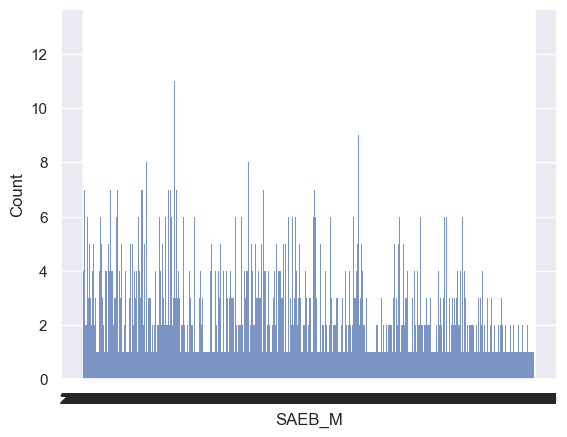

In [56]:
sns.histplot(data = saeb_m, x = "SAEB_M", bins = 20)

### Standardise

In [57]:
saeb_m.head(1)

,rede_b,TX_Apro,SAEB_M
7,0,96.8,258.05


In [59]:
scaler = StandardScaler()

In [60]:
saeb_m[["TX_Apro_T", "SAEB_T" ]] = scaler.fit_transform(
saeb_m[["TX_Apro", "SAEB_M" ]])